# Task 1: Edge AI Prototype

In [24]:
# Install latest TensorFlow (Colab usually has it pre-installed but this is safe)
!pip install -q tensorflow

import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from PIL import Image

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


In [25]:
# Download and extract dataset (untar=True extracts archive)
base_dir = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# Fix path to point inside 'flower_photos' folder where classes reside
data_dir = pathlib.Path(base_dir) / 'flower_photos'

# List class subfolders to verify
classes = sorted([f.name for f in data_dir.iterdir() if f.is_dir()])
print("Classes found:", classes)

# Sanity check: print some sample files per class
for cls in classes:
    cls_path = data_dir / cls
    sample_files = list(cls_path.glob('*'))[:3]
    print(f"Class '{cls}' sample files: {[f.name for f in sample_files]}")

Classes found: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Class 'daisy' sample files: ['7066602021_2647457985_m.jpg', '506493250_e9ca42fe3d.jpg', '18901817451_43e2b45f6c.jpg']
Class 'dandelion' sample files: ['4572738670_4787a11058_n.jpg', '9200211647_be34ce978b.jpg', '3487229452_73e3004858.jpg']
Class 'roses' sample files: ['7147367479_f7a6ef0798.jpg', '4413509121_a62879598a.jpg', '159079265_d77a9ac920_n.jpg']
Class 'sunflowers' sample files: ['19359539074_d7e32e6616_n.jpg', '6606809995_edee55b770_m.jpg', '20658775992_1619cd0a9b_n.jpg']
Class 'tulips' sample files: ['15516736553_b169b67195_n.jpg', '14087860553_bf4f8ec56d.jpg', '402525114_eaa60c8341_m.jpg']


In [26]:
batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [27]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet')

base_model.trainable = False

global_avg_pooling = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(classes), activation='softmax')

model = tf.keras.Sequential([
    base_model,
    global_avg_pooling,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [34]:
epochs = 30
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)


Epoch 1/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6679 - loss: 0.8873 - val_accuracy: 0.5259 - val_loss: 1.1851
Epoch 2/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6752 - loss: 0.8832 - val_accuracy: 0.5177 - val_loss: 1.1931
Epoch 3/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6902 - loss: 0.8514 - val_accuracy: 0.5395 - val_loss: 1.1794
Epoch 4/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6870 - loss: 0.8432 - val_accuracy: 0.5531 - val_loss: 1.1962
Epoch 5/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7068 - loss: 0.8223 - val_accuracy: 0.5204 - val_loss: 1.2023
Epoch 6/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7012 - loss: 0.8386 - val_accuracy: 0.5204 - val_loss: 1.1981
Epoch 7/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.7003 - loss: 0.8274 - val_accuracy: 0.5422 - val_loss: 1.2240
Epoch 8/30
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6918 - loss: 0.8288 - val_ac

In [35]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5547 - loss: 1.1933
Validation Accuracy: 0.5259


In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = "model.tflite"
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved as: {tflite_model_file}")

Saved artifact at '/tmp/tmp9d1rzi7k'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_470')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137578010823184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010825680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010824720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010825488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010826064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010823952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010824144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010822224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010821648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137578010825872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1375780108

Predicted label (TFLite): dandelion
True label: tulips


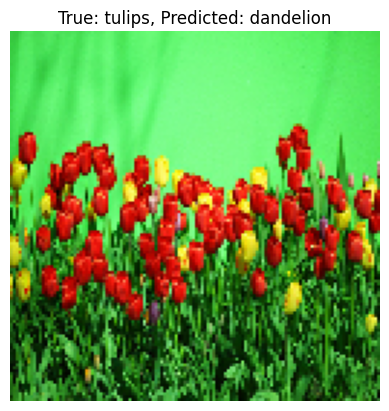

In [37]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_image(image):
    image = tf.image.resize(image, (img_height, img_width))
    image = image / 255.0
    return np.expand_dims(image, axis=0).astype(np.float32)

# Pick one batch from validation dataset to test inference
for images, labels in val_ds.take(1):
    sample_image = images[0].numpy()
    sample_label = labels[0].numpy()

input_data = preprocess_image(sample_image)
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

print(f"Predicted label (TFLite): {classes[predicted_label]}")
print(f"True label: {classes[sample_label]}")

plt.imshow(sample_image.astype(np.uint8))
plt.title(f"True: {classes[sample_label]}, Predicted: {classes[predicted_label]}")
plt.axis('off')
plt.show()


# Edge AI Benefits

- **Real-Time Processing:** Running AI models locally (on edge devices like Raspberry Pi) eliminates network latency, enabling instant decision-making.
- **Privacy & Security:** Sensitive data never leaves the device, reducing privacy risks.
- **Reliability:** Edge AI can operate offline or with intermittent connectivity.
- **Lower Bandwidth:** Only essential data is transmitted, reducing communication costs.
- **Energy Efficiency:** Lightweight models (like MobileNetV2-based) reduce computation power and extend battery life on resource-constrained devices.

This prototype simulates the Edge AI pipeline: training a lightweight model, converting to TensorFlow Lite for edge deployment, and simulating inference on Colab.

